Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
CPU times: user 2min 53s, sys: 11.3 s, total: 3min 4s
Wall time: 49.3 s


,smiles,ROMol,n_atoms,energy
0,C1=CCC=CC1,,6,-231.846762
1,C1=CC=CC=C1,,6,-230.713524
2,C1=C(C)C=CC=C1,,7,-269.753552
3,C1CCC2CCCCC2C1,,10,-389.204842

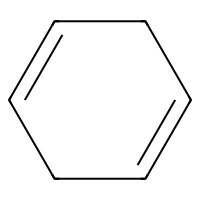
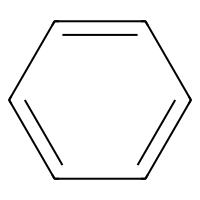
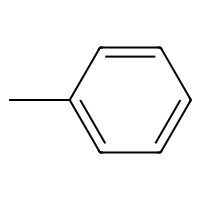
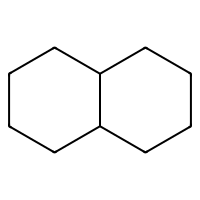

In [9]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from psikit import Psikit

# Read the smiles.csv file
df = pd.read_csv('smiles.csv')

# Convert SMILES to molecule objects and add to DataFrame
df['ROMol'] = df['smiles'].apply(Chem.MolFromSmiles)

# Enable molecule image display in DataFrame using PandasTools
PandasTools.ChangeMoleculeRendering(renderer='PNG')
PandasTools.AddMoleculeColumnToFrame(df, 'smiles', 'ROMol', includeFingerprints=False)

# Calculate the number of atoms and add to the n_atoms column
df['n_atoms'] = df['ROMol'].apply(lambda mol: mol.GetNumAtoms() if mol else None)

# Initialize Psikit instance
pk = Psikit()

# Define a function to compute the optimized energy
def compute_energy(smiles):
    pk.read_from_smiles(smiles)
    pk.optimize()
    return pk.energy()  # Return the actual energy value

# Use %time to time each optimization step
%time df['energy'] = df['smiles'].apply(compute_energy)

# Display the final result
display(df)
